## Statistical Modeling

### Importing data from the UCI Machine Learning Archive.
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [193]:
import pandas as pd

In [194]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cars = pd.read_csv(url, header=None)

print("(rows, colums) =", cars.shape, "\n")
cars.head()

(rows, colums) = (1728, 7) 



,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [195]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, header=0, sep=";")

print("(rows, colums) =", wine.shape, "\n")
wine

(rows, colums) = (1599, 12) 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Data Preprocessing

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
data_url = "http://bit.ly/2cLzoxH"
gm = pd.read_csv(data_url)

gm_07 = gm[gm["year"] == 2007]

print(gm.shape, "\n", gm_07.shape, "\n")
print(gm_07.dtypes, "\n")
print(gm_07.isnull().sum())

gm_07

(1704, 6) 
 (142, 6) 

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object 

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64


,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


#### Exploratory Data Analysis (EDA)

In [246]:
# x = gm_07["gdpPercap"]
# y = gm_07["lifeExp"]


# gdp_hist = plt.hist(x)
# plt.xlabel("GDP")
# plt.ylabel("Frequency")
# plt.title("Distribution of GDP in Countries of the World, 2007")
# plt.show()

# # make sure the independent variable is the log of gdpPercap
# # this is because the relationship between GDP and life expectancy is not linear
# gdp_hist = plt.hist(np.log(x))
# plt.xlabel("log(GDP)")
# plt.ylabel("Frequency")
# plt.title("Distribution of log(GDP) in Countries of the World, 2007")
# plt.show()

# gdp_hist = plt.hist(y)
# plt.xlabel("Life Expectancy")
# plt.ylabel("Frequency")
# plt.title("Distribution of Life Expectancy in Countries of the World, 2007")
# plt.show()

In [247]:
plt.subplots(1, 3, figsize=(18, 5))

(<Figure size 1800x500 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

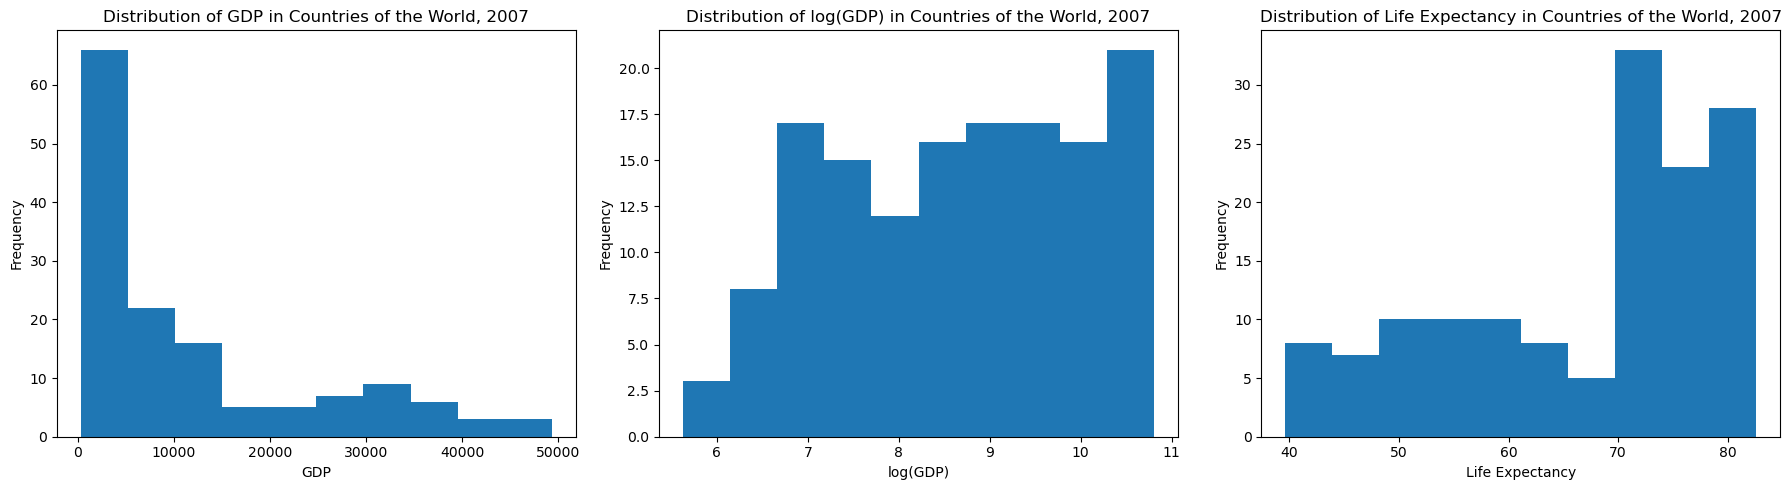

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the histogram for GDP
axs[0].hist(x)
axs[0].set_xlabel("GDP")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of GDP in Countries of the World, 2007")

# Plot the histogram for log(GDP)
axs[1].hist(np.log(x))
axs[1].set_xlabel("log(GDP)")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of log(GDP) in Countries of the World, 2007")

# Plot the histogram for Life Expectancy
axs[2].hist(y)
axs[2].set_xlabel("Life Expectancy")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Life Expectancy in Countries of the World, 2007")

# Adjusts the padding between and around subplots to minimize overlap
plt.tight_layout()
plt.show()

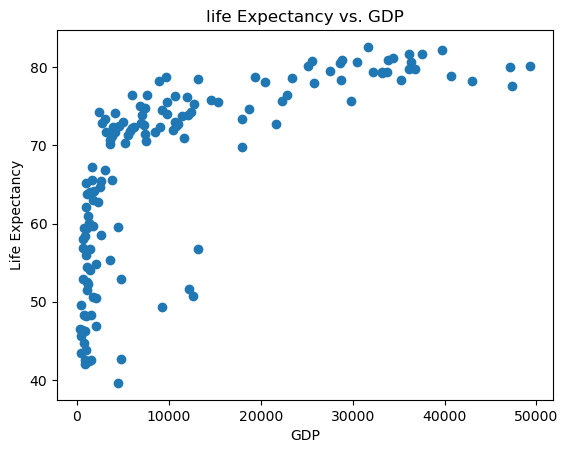

In [231]:
x=gm_07['gdpPercap']
y=gm_07['lifeExp']

plt.scatter(x,y)

plt.title('life Expectancy vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

plt.show()

#### Fitting a model to a scatterplot
We can use a tool from numpy called polynomial which will allow us to fit the linear model to the scatterplot.  

In [200]:
from numpy.polynomial.polynomial import polyfit

# make sure the independent variable is the log of gdpPercap
x = np.log(gm_07["gdpPercap"])
# specify the dependent variable as life expectancy
y = gm_07["lifeExp"]

# Fit with polyfit
b, m = polyfit(x, y, 1) # Degree 1: Fits a straight line

print(f"Best fit line: y = {b:.2f} + {m:.2f}x")
polyfit(x, y, 1)

Best fit line: y = 4.95 + 7.20x


array([4.94961165, 7.20280157])

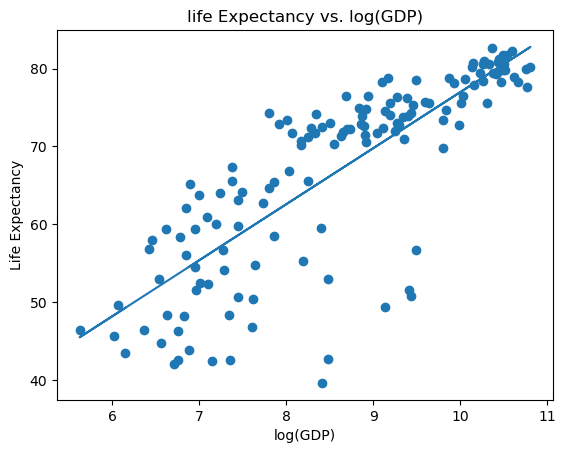

In [201]:
plt.scatter(x, y)
plt.plot(x, b + m * x, "-")

plt.title("life Expectancy vs. log(GDP)")
plt.xlabel("log(GDP)")
plt.ylabel("Life Expectancy")

plt.show()

In [202]:
plt.close()

#### Measuring Strength

**Interpreting Correlations**
```
r close to 0 ---- 'weak'
r close to 0.5/-0.5 ---- 'moderate'
r close to 1/-1 ---- 'strong'
```

The correlation measures the strength and direction of the linear association between two quantitative variables. The correlation between gdpPercap and lifeExp is r = 0.678 indicates a relatively strong association between the two variables.  

In [203]:
gm_07_q = gm_07[["pop", "lifeExp", "gdpPercap"]]
gm07_corr = gm_07_q.corr()
gm07_corr

,pop,lifeExp,gdpPercap
pop,1.000000,0.047553,-0.055676
lifeExp,0.047553,1.000000,0.678662
gdpPercap,-0.055676,0.678662,1.000000


• `np.ones_like(gm07_corr)`: Creates an array of ones with the same shape as corr.  
• `dtype=bool`: Converts the array of ones into a boolean array (True for   every element).

Thus, the mask is a boolean array where:   
• `np.triu()`: Extracts the upper triangle of the array (including the diagonal), leaving True for those elements to be hidden and False for the rest of the elements to be shown.

In [204]:
np.ones_like(gm07_corr, dtype=bool)
np.triu(np.ones_like(gm07_corr, dtype=bool))

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

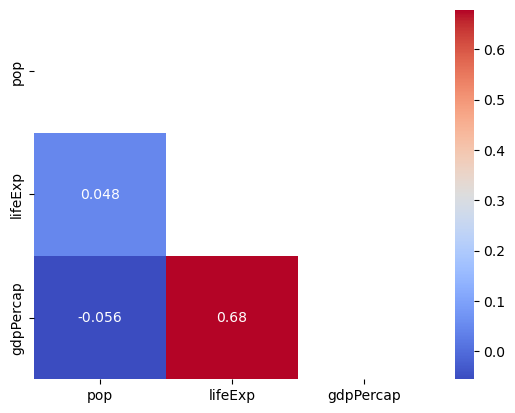

In [205]:
# Generate a mask for the upper triangle

# mask = np.tril(np.ones_like(corr, dtype=bool))
mask = np.triu(np.ones_like(gm07_corr, dtype=bool))
sns.heatmap(gm07_corr, mask=mask, cmap='coolwarm', annot=True)

plt.show()

### Regression Analysis

When specifying the linear regression model using the statsmodels formula module it looks like this.
```
'LifeExp ~ log_GDP'
```
In other words, model the Life Expectancy as a function of log(GDP).

In [206]:
import statsmodels.formula.api as smf

# use smf.ols function to generate the linear model (ordinary least squares regression)
log_GDP = np.log(gm_07["gdpPercap"])
results = smf.ols("lifeExp ~ log_GDP", data=gm_07).fit()
print(results)

# inspect the results with the summary() method
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           4.12e-34
Time:                        02:26:44   Log-Likelihood:                -479.26
No. Observations:                 142   AIC:                             962.5
Df Residuals:                     140   BIC:                             968.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9496      3.858      1.283      0.2

### Interpreting Regression Output


- Slope (The second value in the 'coef' column): For each unit increase in the log(GDP) variable the model predicts a 7.2 year increase in the Country's life expectancy.  

- R-squared: 65% of the variation in Life Expectancy is explained by the linear regression predicting Life Expectancy from log(GDP)

- P-value: The p-value is approximately 0 meaning the observed relationship is unlikly to occur by chance.  It is more plausible to conclude that the observed relationship is a product of a meaningful phenomenon rather than random occurance.


The regression output helps us quantify the relationship between the variables and evaluate the model as far as it's usefulness in predicting Life Expectancy from GDP.  
- The p-value suggests that the linear relationship is statistically significant (unlikely to happen by chance alone).  

- The R-squared value tells us that the linear model predicting Life Expectancy from GDP explains 65% of the variation in Life Expectancy.  

- In general, low p-value, high R-squared provides strong validation that the model is appropriate and meaningful for these data.  

## Exercises

### Exercise: Home Price 

#### Data Preprocessing

In [232]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
import requests
from io import StringIO

orig_url = (
    "https://drive.google.com/file/d/1rB57Xkdr6H-BrkyaMT09W3Q2obOCqu3Z/view?usp=sharing"
)

file_id = orig_url.split("/")[-2]
dwn_url = "https://drive.google.com/uc?export=download&id=" + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
home_values = pd.read_csv(csv_raw)

print(home_values.keys())
print("(rows, colums) =",home_values.shape, "\n")
print(home_values.dtypes, "\n")
print(home_values.isnull().sum())

home_values.head()

Index(['Assessed Value', 'Price ($000)', 'Type', 'Time'], dtype='object')
(rows, colums) = (30, 4) 

Assessed Value    float64
Price ($000)      float64
Type                int64
Time                int64
dtype: object 

Assessed Value    0
Price ($000)      0
Type              0
Time              0
dtype: int64


,Assessed Value,Price ($000),Type,Time
0,178.17,194.10,0,10
1,180.24,201.90,0,10
2,174.03,188.65,1,11
3,186.31,215.50,1,2
4,175.22,187.50,1,5


In [208]:
h_stat=home_values.describe()
h_stat

,Assessed Value,Price ($000),Type,Time
count,30.000000,30.000000,30.000000,30.000000
mean,176.668000,192.428000,0.600000,8.700000
std,6.759775,12.518641,0.498273,4.526931
min,159.930000,161.900000,0.000000,1.000000
25%,174.100000,187.787500,0.000000,5.000000
50%,177.930000,194.300000,1.000000,10.000000
75%,180.175000,197.750000,1.000000,12.000000
max,186.310000,215.500000,1.000000,17.000000


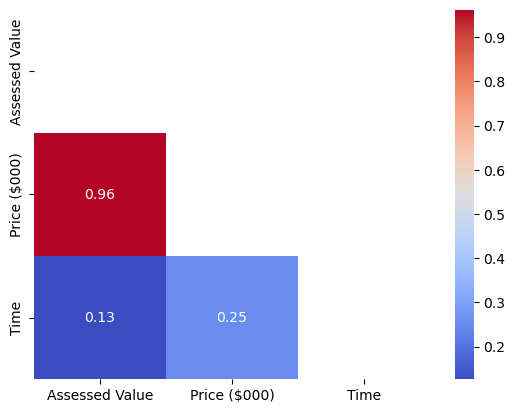

In [234]:
# hv_q = home_values[["Assessed Value", "Price ($000)", "Time"]]
hv_q = home_values.drop(columns="Type")
corr = hv_q.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)

plt.show()

**Scatterplot Matrix**

When we have multiple explanatory variables, it can be useful to create a scatterplot matrix to visualize the patterns in the relationships in pairwise combinations of variables.


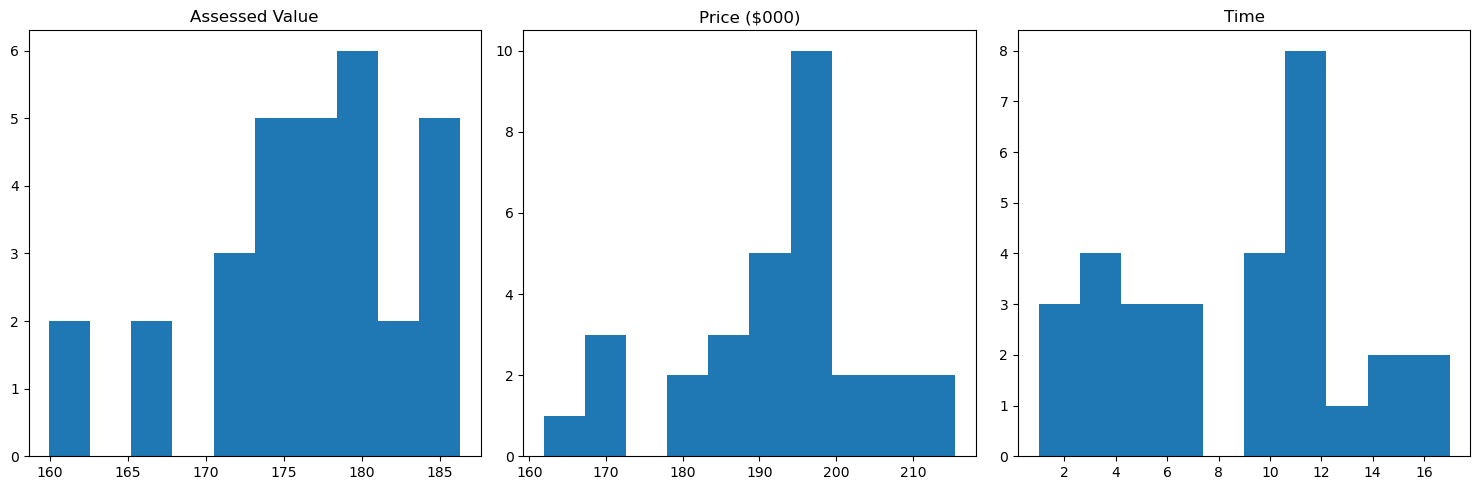

In [253]:
# Plot Histograms Side by Side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 3 subplots

# Plot the histogram for 'Assessed Value'
axs[0].hist(home_values["Assessed Value"])
axs[0].set_title('Assessed Value')

# Plot the histogram for 'Price ($000)'
axs[1].hist(home_values["Price ($000)"])
axs[1].set_title('Price ($000)')

# Plot the histogram for 'Time'
axs[2].hist(home_values["Time"])
axs[2].set_title('Time')

# Display the plots
plt.tight_layout()
plt.show()

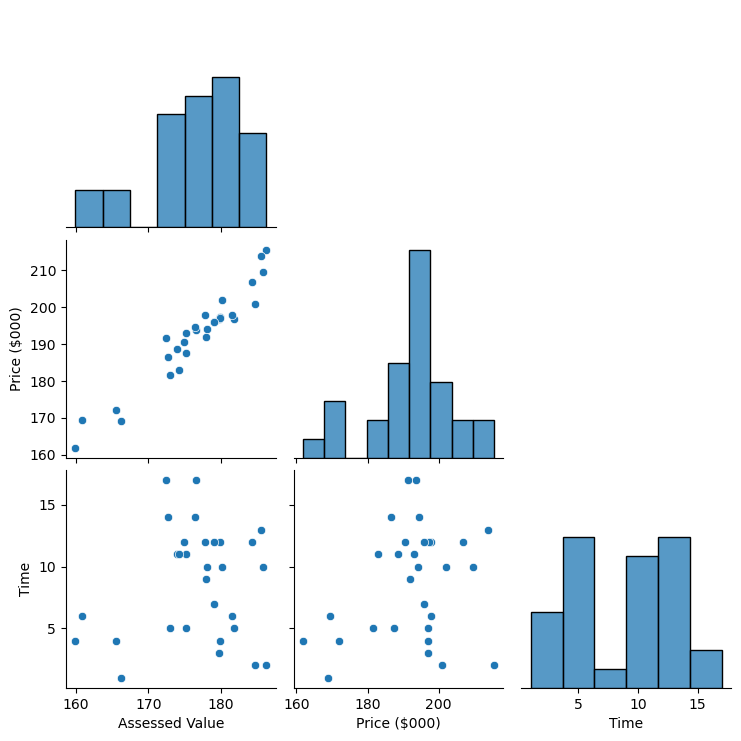

In [235]:
sns.pairplot(hv_q, corner=True)
plt.show()

#### Regression Analysis
Perform the linear regression analysis all three explanatory variables (Assessed Value, Time, Type) in order to predict the response variable (Price).

In [ ]:
import statsmodels.formula.api as smf

# Name should be changed because of the space in the column name
home_values["Price"] = home_values["Price ($000)"]
home_values["Assessed"] = home_values["Assessed Value"]

# use smf.ols (ordinary least squares regression) function to generate the linear model
lm = smf.ols("Price ~ Assessed + Type + Time", data=home_values).fit()

# inspect the results with the summary() method
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.79e-16
Time:                        02:26:48   Log-Likelihood:                -74.417
No. Observations:                  30   AIC:                             156.8
Df Residuals:                      26   BIC:                             162.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -128.2867     17.554     -7.308      0.0

#### Interpreting Regression Output

**Coefficients:**

- Assessed Value:  
For each increase of $1000 in the assessed value, the model predicts an increase of `$1794` in the selling prices (statistically significant, p-value = `0.00`).

- Type:  
When the home type is a single family, the model predicts an increase of `$1218` in the selling price.  (not statistically significant, p-value = `0.366`)

- Time:  
For each additional day a house is on the market, the model predicts and increase of `$351` in the selling price. (statistically significant, p-value = `0.012`)


**Intercept:**

- Intercept:  
When all explanatory variables are equal to 0, the model predicts a selling price of `-$128,287`. (not meaningful in the context of this scenario)

- Adj R-squared:  
About `94%` of the variation in the home prices is explained by the linear regression model.  


- P-value:   
The overall statistical significance of the linear model is measured by the f-test for regression.  A small p-value means that the model developed from this data is unlikely to be observed by chance, therefore it is more plausible to attribute the observed relationship between variables to an actual phenomenon.  The p-value associated with the f-statistic in this case is `1.79e-16`.  Because this is extremely small, we conclude that there is an actual relationship between the collection of explanatory variables and the selling price.  




### Exercise: Wine Quality
The exercises in this assignment are based on a data set that contains several characteristics of red wine along with a measure of wine quality as rated by expert wine tasters. Our objective in this analysis is to understand the relationship between the collection of variables describing the wine and the quality rating. We will take some time to understand the output and evaluate the model. We will come back to this data set in the next unit to attempt to improve the predictive power of the model. The wine quality data set can be found in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) which holds a large collection of data sets useful for practicing techniques in the domains of statistical modeling and machine learning.

In [212]:
# # suppress warning messages to improve output readability
# import warnings
# warnings.filterwarnings("ignore")

#### Data Preprocessing

In [213]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

wine = pd.read_csv(url, header=0, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [215]:
wine = wine.rename(
    columns={
        "fixed acidity": "fixed_acidity",
        "volatile acidity": "volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar": "residual_sugar",
        "free sulfur dioxide": "free_sulfur_dioxide",
        "total sulfur dioxide": "total_sulfur_dioxide",
    }
)
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [216]:
# 1a. Determine the variable names

k = wine.columns
print("THE VARIABLES ARE:", "\n", k, "\n")

THE VARIABLES ARE: 
 Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object') 



In [217]:
# 1b. Find the number of rows and columns

dim = wine.shape
print("(rows,columns):", dim, "\n")

(rows,columns): (1599, 12) 



In [218]:
# 1c. Check all of the data types

dt = wine.dtypes
print("CHECKING THE DATA TYPES:", "\n", dt, "\n")

CHECKING THE DATA TYPES: 
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 



In [219]:
# 1d. See if there are any missing values in the data

nulls = wine.isnull().sum()
print("CHECKING FOR NULL VALUES:", "\n", nulls)

CHECKING FOR NULL VALUES: 
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [220]:
# 2a. find statistical summmary of the data

w_stat = wine.describe()
w_stat.round(decimals=2)
# print("STATISTICAL SUMMARY OF WINE DATA:", "\n", w_stat.round(decimals=2))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [221]:
# 2b.i. calculate the pairwise correlations

corr = wine.corr()
corr.round(decimals=2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile_acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric_acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual_sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free_sulfur_dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total_sulfur_dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


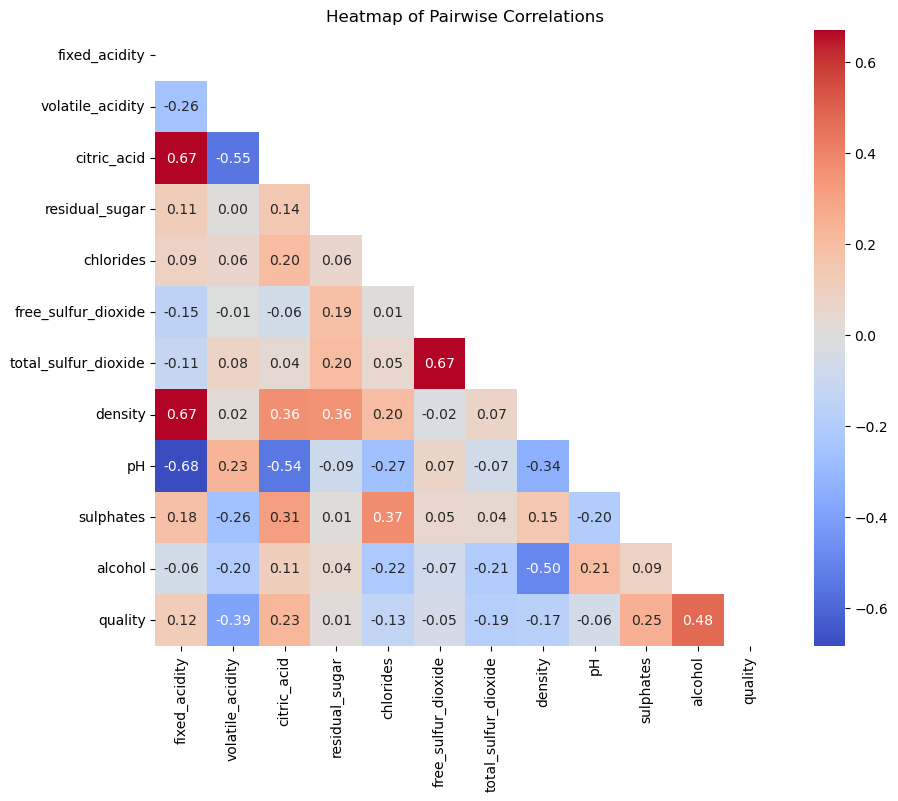

In [222]:
# b.ii. Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
plt.title("Heatmap of Pairwise Correlations")

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.show()

#### Regression Analysis

In [223]:
# Build the formula using the following
X = list(wine.columns)
X.remove("quality")


predictors = " + ".join(X)
print("PREDICTOR VARIBLES:", "\n", predictors, "\n")

f = "quality~" + predictors
print("REGRESSION FORMULA:", "\n", f, "\n")

PREDICTOR VARIBLES: 
 fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol 

REGRESSION FORMULA: 
 quality~fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol 



In [224]:
import statsmodels.formula.api as smf

lm = smf.ols(formula=f, data=wine).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.79e-145
Time:                        02:26:48   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652 

In [225]:
f2 = "quality~" + "alcohol+volatile_acidity"
print("REGRESSION FORMULA:", "\n", f2, "\n")

REGRESSION FORMULA: 
 quality~alcohol+volatile_acidity 



In [226]:
lm = smf.ols(formula=f2, data=wine).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     370.4
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          7.35e-133
Time:                        02:26:48   Log-Likelihood:                -1621.8
No. Observations:                1599   AIC:                             3250.
Df Residuals:                    1596   BIC:                             3266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0955      0.184  

#### Interpreting Regression Output

**Coefficients:**

- Alcohol Content:
For each unit increase in the alcohol content, the model predicts an increase of ***0.3138*** in the wine quality (statistically significant, p-value=0.00).

- Volatile Acidity:
For each unit increase in the volatile acidity, the model predicts a ***1.3836*** decrease in the wine quality rating. (statistically significant, p-value=0.00)

**Intercept:**

When all explanatory variables are equal to 0, the model predicts a wine quality rating of ***3.0955***.  (not meaningful in the context of this scenario)


- Adj R-squared:  
About ***31.6%*** of the variation in the wine quality ratings is explained by the linear regression model.  


- P-value:  
The overall statistical significance of the linear model is measured by the f-test for regression.  A small p-value means that the model developed from this data is unlikely to be observed by chance, therefore it is more plausible to attribute the observed relationship between variables to an actual phenomenon.  The p-value associated with the f-statistic in this case is $7.35 \times 10^{-133}$. Because this is extremely small, we conclude that there is an actual relationship between the collection of explanatory variables and the wine quality rating.  


### Exercise: Sum Budgets

Create the function called get_budgets() that takes a list of dictionaries and returns the sum of people's budgets. See the examples below.

In [227]:
# YOUR CODE
def get_budgets(lst):
    # budgets = [i['budget'] for i in lst]
    # return sum(budgets)

    total = 0
    for i in lst:
        total = total + i['budget']
    return total

In [228]:
# TEST 1
lst1=[
  { "name": "John", "age": 21, "budget": 23000 },
  { "name": "Steve",  "age": 32, "budget": 40000 },
  { "name": "Martin",  "age": 16, "budget": 2700 }
]
b1 = get_budgets(lst1) # ➞ 65700
print(b1)

# TEST 2
lst2=[
  { "name": "John",  "age": 21, "budget": 29000 },
  { "name": "Steve",  "age": 32, "budget": 32000 },
  { "name": "Martin",  "age": 16, "budget": 1600 }
]
b2 = get_budgets(lst2) # ➞ 62600
print(b2)

65700
62600


### Exercise: Compound Interest

Suppose that you invest $10,000 for 10 years at an interest rate of 6% compounded monthly. What will be the value of your investment at the end of the 10 year period?  
Note that the interest rate is given as a decimal and n=12 because with monthly compounding there are 12 periods per year. Compounding can also be done annually, quarterly, weekly, or daily.

`compound_interest(10000, 10, 0.06, 12) ➞ 18193.97`

Create a function that accepts the principal p, the term in years t, the interest rate r, and the number of compounding periods per year n. The function returns the value at the end of term rounded to the nearest cent.




In [236]:
# YOUR CODE
def compound_interest(p, t, r, n):
    a = p * (1 + r/n)**(n*t)
    return round(a, 2)

In [237]:
# Examples
c1 = compound_interest(100, 1, 0.05, 1) # ➞ 105.0
print(c1)

c2 = compound_interest(3500, 15, 0.1, 4) # ➞ 15399.26
print(c2)

c3 = compound_interest(100000, 20, 0.15, 365) # ➞ 2007316.26
print(c3)

105.0
15399.26
2007316.26
